In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from keras.optimizers import Adam


veri = pd.read_csv("/content/car_price.csv")
veri = veri.drop(columns="ID")

#veri.isnull().sum()
#veri.info()
#veri["Levy"].unique()

veri["Levy"] = veri["Levy"].replace("-",np.nan)
veri["Levy"] = veri["Levy"].fillna(0)
veri["Levy"] = veri["Levy"].astype(int)

veri["Turbo"] = veri["Engine volume"].apply(lambda x: "Turbo" if "Turbo" in str(x) else "Non Turbo")
veri["Engine volume"] = veri["Engine volume"].str.replace(" Turbo","").astype(float)

veri["Mileage"] = veri["Mileage"].str.replace(" km","").astype(int)
veri['Cylinders'] = veri['Cylinders'].astype(int)
veri['Doors'] = np.where(veri['Doors'] == '04-May', 4, veri['Doors'])
veri['Doors'] = np.where(veri['Doors'] == '02-Mar', 2, veri['Doors'])
veri['Doors'] = np.where(veri['Doors'] == '>5', 5, veri['Doors'])
veri['Doors'] = veri['Doors'].astype(int)

cat = []

for i in veri.columns:
  if veri[i].dtypes == "object":
    cat.append(i)

le = LabelEncoder()

for i in cat:
  veri[i] = le.fit_transform(veri[i])

y = veri["Price"]
x = veri.drop(columns="Price")

sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=0)

model = Sequential()

model.add(Dense(16,activation="relu",input_dim=x_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="relu"))

model.compile(optimizer=Adam(0.01),loss="mean_squared_error",metrics=["mean_absolute_error"])
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=300,batch_size=64)


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


217/217 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 120098922496.0000 - mean_absolute_error: 18307.8320 - val_loss: 182100528.0000 - val_mean_absolute_error: 8621.4688
Epoch 2/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 134863044608.0000 - mean_absolute_error: 15354.3779 - val_loss: 160060320.0000 - val_mean_absolute_error: 7963.1704
Epoch 3/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 33148086272.0000 - mean_absolute_error: 10638.0225 - val_loss: 170250768.0000 - val_mean_absolute_error: 8404.4551
Epoch 4/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 117617532928.0000 - mean_absolute_error: 17345.0039 - val_loss: 172445584.0000 - val_mean_absolute_error: 8631.6924
Epoch 5/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12562342912.0000 - mean_absolute_error: 10268.7881 - val_loss: 170379296.0000 - val_mean_absolute_error: 8481.4590
Epoch 6/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 86435037184.0000 - mean_absolute_error: 15980.0850 - val_loss: 1801

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


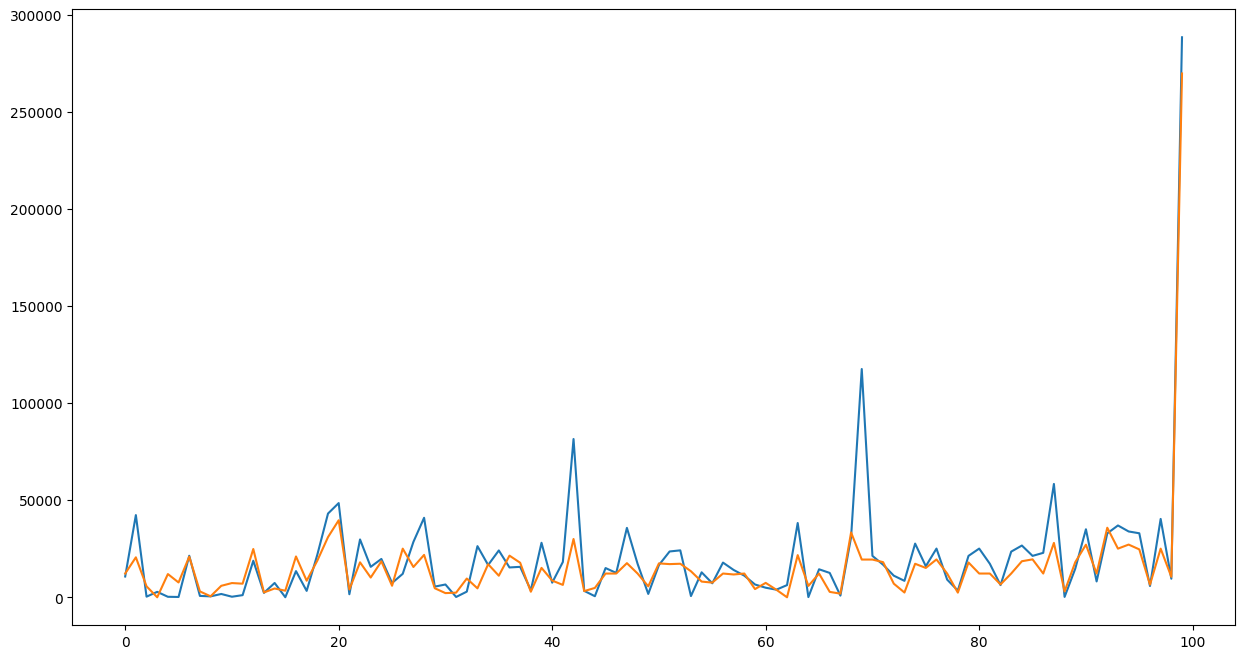

In [25]:
prediction = model.predict(x_test)

plt.figure(figsize=(15,8))
plt.plot(range(len(y_test[:100])),y_test[:100],label="Actual Values")
plt.plot(range(len(prediction[:100])),prediction[:100],label="Predicted Values")
plt.show()


In [26]:
results = model.evaluate(x_test,y_test,batch_size=64,verbose=0)
print("test loss, test acc:", results)

test loss, test acc: [187281696.0, 7467.2109375]
